# Analyzing Nobel Prize winners

In [1]:
# Importing rquired libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
nobel = pd.read_csv("./nobel.csv")
nobel.head(3)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany


In [3]:
nobel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  1000 non-null   int64 
 1   category              1000 non-null   object
 2   prize                 1000 non-null   object
 3   motivation            912 non-null    object
 4   prize_share           1000 non-null   object
 5   laureate_id           1000 non-null   int64 
 6   laureate_type         1000 non-null   object
 7   full_name             1000 non-null   object
 8   birth_date            968 non-null    object
 9   birth_city            964 non-null    object
 10  birth_country         969 non-null    object
 11  sex                   970 non-null    object
 12  organization_name     736 non-null    object
 13  organization_city     735 non-null    object
 14  organization_country  735 non-null    object
 15  death_date            596 non-null    o

______
### Q: What is the most commonly awarded gender and birth country?



In [4]:
top_gender = nobel["sex"].value_counts().idxmax()
print(top_gender)

Male


In [5]:
top_country =  nobel["birth_country"].value_counts().idxmax()
print(top_country)

United States of America


In [6]:
# Alternate method to find top_birth_country and top_gender
aa = nobel["birth_country"].value_counts().squeeze().index[0]
print(aa)

United States of America


In [7]:
nobel.head(3)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany


______
### Q: Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?
>Trick to use when calculating the decade:<br>
>`2019//10 * 10`

In [8]:
# Note that yer is stored as int dtype
nobel["year"].dtype

dtype('int64')

In [9]:
# Adding a new column to calculate decade & then grouping by this column
decade = (nobel["year"]//10) * 10

nobel.insert(1,"Decade",value=decade)
nobel.head(3)

,year,Decade,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,1900,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,1900,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,1900,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany


Filtering US-born prize winners


In [10]:
# Filtering US-born prize winners
# nobel[nobel["birth_country"]=="United States of America"]
nobel[nobel["birth_country"]=="United States of America"].groupby("Decade")["full_name"].count()

Decade
1900     1
1910     3
1920     4
1930    14
1940    13
1950    21
1960    21
1970    33
1980    31
1990    42
2000    52
2010    38
2020    18
Name: full_name, dtype: int64

In [11]:
# Adding total winners per decade
nobel["Winners_Per_Decade"] = nobel.groupby(["Decade"])["full_name"].transform("count")

In [12]:
# Adding total winners per decade by country
nobel["Winners_Per_Decade_ByCountry"] = nobel.groupby(["birth_country"])["full_name"].transform("count")

In [13]:
nobel["Winners_Ratio"]= round((nobel["Winners_Per_Decade_ByCountry"] / nobel["Winners_Per_Decade"]*100),2)
nobel.head(2)

,year,Decade,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,Winners_Per_Decade,Winners_Per_Decade_ByCountry,Winners_Ratio
0,1901,1900,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,...,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,57,19.0,33.33
1,1901,1900,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,...,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,57,58.0,101.75


In [14]:
max_decade_usa = nobel[nobel["birth_country"]=="United States of America"].groupby("Decade")["Winners_Ratio"].mean().idxmax()
print(max_decade_usa)

1910


### Q: Which decade and Nobel Prize category combination had the highest proportion of female laureates?

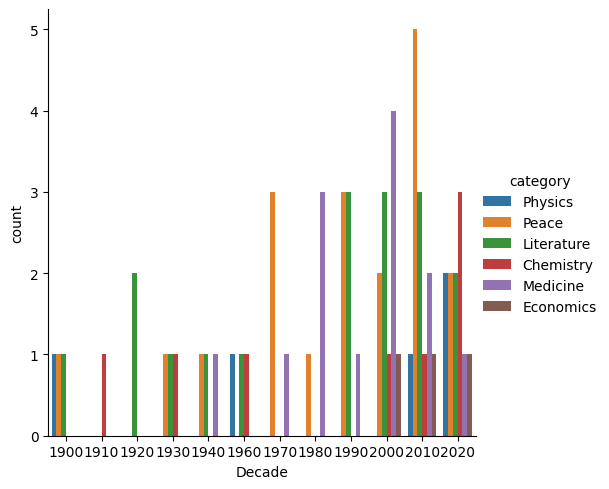

In [15]:
# Visualizing female winners by category
# plt.figure(figsize=(10,4))
sns.catplot(data=nobel[nobel["sex"]=="Female"], x="Decade", hue="category", kind="count")
# plt.tight_layout()
plt.show()

In [16]:
female_noble_winners = nobel[nobel["sex"]=="Female"].groupby(["Decade","category"],as_index=False).agg(total_female_winners=("full_name","count"))
# female_noble_winners.set_index("Decade",inplace=True)
female_noble_winners

,Decade,category,total_female_winners
0,1900,Literature,1
1,1900,Peace,1
2,1900,Physics,1
3,1910,Chemistry,1
4,1920,Literature,2
5,1930,Chemistry,1
6,1930,Literature,1
7,1930,Peace,1
8,1940,Literature,1
9,1940,Medicine,1


In [17]:
# Finding the decade & category with most female winners
max_female_winner = female_noble_winners.loc[female_noble_winners.groupby("Decade")["total_female_winners"].idxmax()]
max_female_winner.set_index("Decade", inplace=True)
max_female_dict = max_female_winner[max_female_winner["total_female_winners"]==max_female_winner["total_female_winners"].max()]["category"].to_dict()
max_female_dict

{2010: 'Peace'}

### Q: Who was the first woman to receive a Nobel Prize, and in what category?

In [18]:
# creating a df for all women winners
w_nobel = nobel[nobel["sex"]=="Female"]
w_nobel.head(2)

,year,Decade,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,Winners_Per_Decade,Winners_Per_Decade_ByCountry,Winners_Ratio
19,1903,1900,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,57,5.0,8.77
29,1905,1900,Peace,The Nobel Peace Prize 1905,NaN,1/1,468,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,...,Female,NaN,NaN,NaN,1914-06-21,Vienna,Austria,57,1.0,1.75


In [19]:
first_female_winner = w_nobel[w_nobel["year"]==w_nobel["year"].min()]

first_woman_name = first_female_winner["full_name"].values[0]
print(first_woman_name)

first_woman_category = first_female_winner["category"].values[0]
print(first_woman_category)

Marie Curie, née Sklodowska
Physics


### Q: Which individuals or organizations have won more than one Nobel Prize throughout the years?
- Store the full names in a list named repeat_list.


In [20]:
nobel["laureate_type"].value_counts()

laureate_type
Individual      966
Organization     34
Name: count, dtype: int64

In [21]:
most_wins = nobel["full_name"].value_counts().reset_index()
repeat_list = most_wins[most_wins["count"]>1]["full_name"].to_list()
repeat_list

['Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Frederick Sanger',
 'Marie Curie, née Sklodowska',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)',
 'John Bardeen',
 'Linus Carl Pauling']